In [1]:
# Aim of this notebook is to visualise different gradient descent methods

# Import packages

import matplotlib.pyplot as plt
#from matplotlib import cm
from matplotlib.colors import LogNorm
import numpy as np

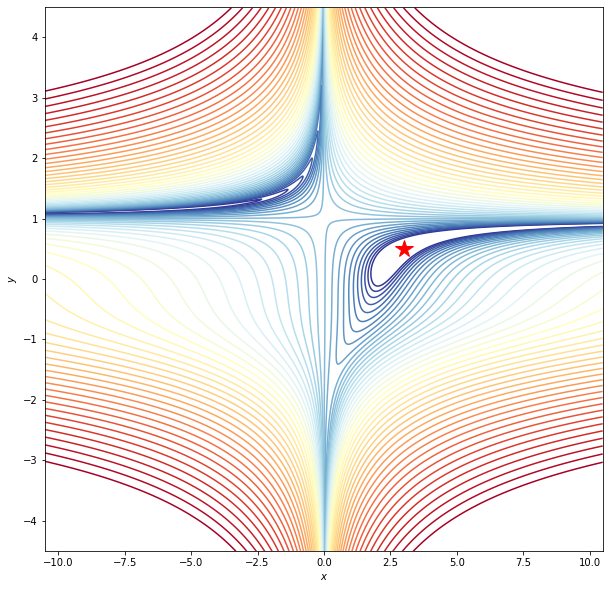

In [2]:
def beales_function(x,y):
    f=np.square(1.5-x+x*y)+np.square(2.25-x+x*y*y)+np.square(2.625-x+x*y**3)
    return f

def grad_beales_function(params):
    x=params[0]
    y=params[1]
    grad_x=2*(1.5-x+x*y)*(-1+y)+2*(2.25-x+x*y**2)*(-1+y**2)+2*(2.625-x+x*y**3)*(-1+y**3)
    grad_y=2*(1.5-x+x*y)*x+4*(2.25-x+x*y**2)*x*y+6*(2.625-x+x*y**3)*x*y**2
    return [grad_x,grad_y]

def contour_beales_function():
    #plot beales function
    x, y = np.meshgrid(np.arange(-10.5, 10.5, 0.01), np.arange(-10.5, 4.5, 0.01))
    fig, ax = plt.subplots(figsize=(10, 10))
    z=beales_function(x,y)
    ax.contour(x, y, z, levels=np.logspace(0, 5, 45), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(3,0.5, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((-10.5, 10.5))
    ax.set_ylim((-4.5, 4.5))
    
    return fig,ax
    

#Contour plot of Beale's Function

fig4,ax4 =contour_beales_function()

In [4]:
# To visualise mini-batches, i.e. stochasticity, we add noise to the gradient


#Mean-gradient based methods
def gd(grad, init, n_epochs=1000, eta=10**-4, noise_strength=1):
    #This is a simple optimizer
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj




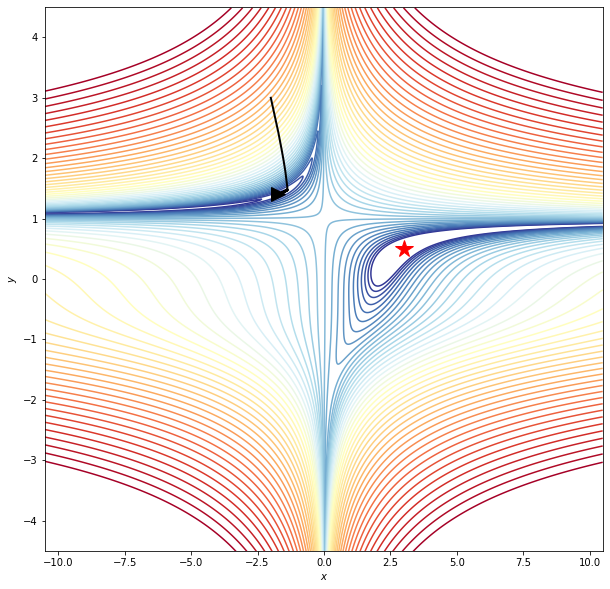

In [5]:
#Visualise trajectories: SGD

def overlay_trajectory_contour_M(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    ax.plot(xs[-1],ys[-1],color+'>', markersize=14)
    return ax;

#Make static plot of the results
Nsteps=10**4
#lr_l=10**-3
lr_s=10**-4 # change to 10**-4
#lr_s=10**-6
#init1=np.array([4,3])
init1=np.array([-2,3])

fig1, ax1=contour_beales_function()
gd_trajectory1=gd(grad_beales_function,init1,Nsteps, eta=lr_s, noise_strength=4.5) #change noise strength 1, 10, 100
overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GD','k')

In [6]:
# GD with momentum

def gd_with_mom(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=gamma*v+eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

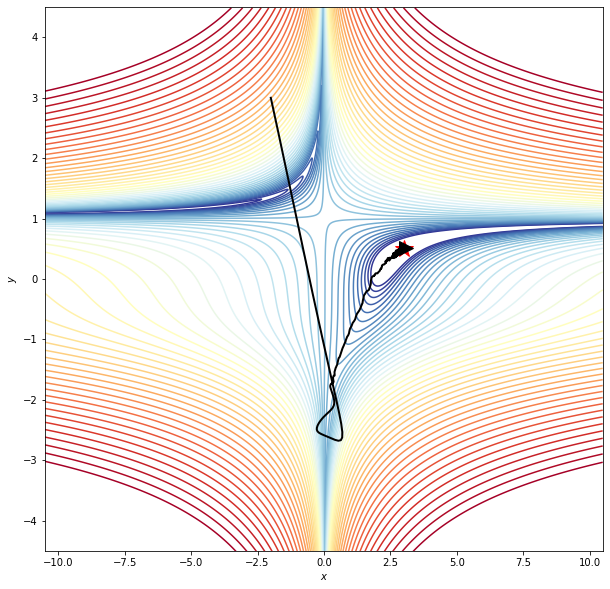

In [7]:
def overlay_trajectory_contour_M(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    ax.plot(xs[-1],ys[-1],color+'>', markersize=14)
    return ax;

#Make static plot of the results
Nsteps=10**4
#lr_l=10**-3
#lr_s=10**-3
lr_s=10**-4
#lr_s=10**-5
#init1=np.array([4,3])
init1=np.array([-2,3])
#init1=np.array([-0.3,4])

fig1, ax1=contour_beales_function()
gdm_trajectory1=gd_with_mom(grad_beales_function,init1,Nsteps,eta=lr_s, gamma=0.9,noise_strength=4.5)


overlay_trajectory_contour_M(ax1,gdm_trajectory1, 'GDM','k')

In [8]:
#Nesterov AG

def NAG(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        params_nesterov=params-gamma*v
        v=gamma*v+eta*(np.array(grad(params_nesterov))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

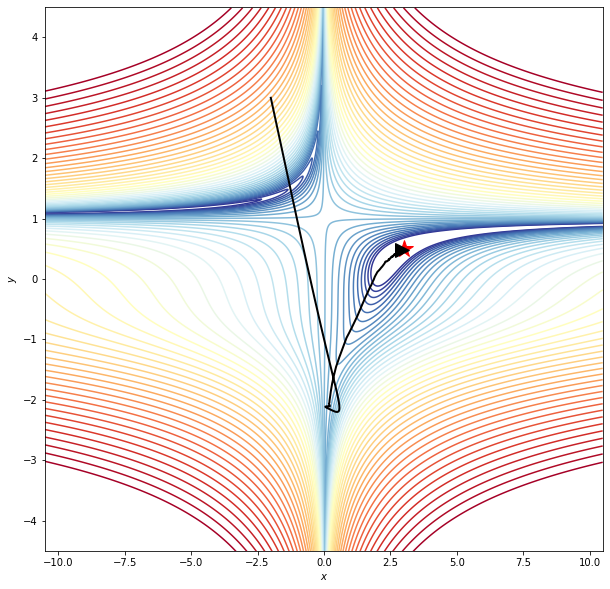

In [9]:
def overlay_trajectory_contour_M(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    ax.plot(xs[-1],ys[-1],color+'>', markersize=14)
    return ax;

#Make static plot of the results
Nsteps=10**4
#lr_l=10**-3
lr_s=10**-4
#lr_s=10**-4
#init1=np.array([4,3])
init1=np.array([-2,3])
#init1=np.array([-0.3,4])

fig1, ax1=contour_beales_function()
NAG_trajectory1=NAG(grad_beales_function,init1,Nsteps,eta=lr_s, gamma=0.9,noise_strength=1)
overlay_trajectory_contour_M(ax1,NAG_trajectory1, 'GDM','k')

In [10]:
def rms_prop(grad, init, n_epochs=5000, eta=10**-3, beta=0.9,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init#Import relevant packages
    grad_sq=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v=eta*np.divide(g,np.sqrt(grad_sq+epsilon))
        params= params-v
        param_traj[j+1,]=params
    return param_traj

C:\Users\Richard\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
C:\Users\Richard\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
C:\Users\Richard\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\Richard\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


Text(0.5, 1.0, 'Comparing Trajectories')

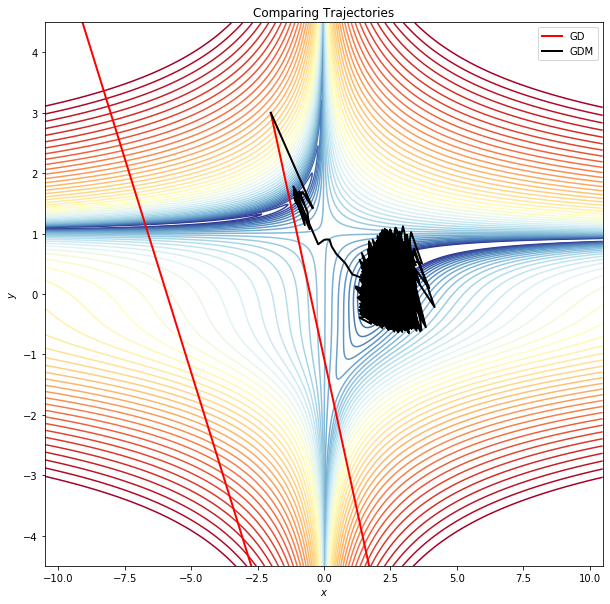

In [11]:
def overlay_trajectory_contour_M(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    ax.plot(xs[-1],ys[-1],color+'>', markersize=14)
    return ax;

#Make static plot of the results
Nsteps=10**4
#lr_l=10**-3
lr_r=5*10**-3
lr_s=5*10**-1
#lr_s=10**-4
init1=np.array([4,3])
init1=np.array([-2,3])
#init1=np.array([-0.3,4])

fig1, ax1=contour_beales_function()
rms_prop_trajectory1=rms_prop(grad_beales_function,init1,Nsteps,eta=lr_s, beta=0.9,epsilon=10**-8,noise_strength=1)


gd_trajectory1=gd(grad_beales_function,init1,Nsteps, eta=lr_r, noise_strength=0.1)
overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GD','r')

overlay_trajectory_contour_M(ax1,rms_prop_trajectory1, 'GDM','k')
plt.legend()
plt.title('Comparing Trajectories')